In [1]:
import numpy as np
from dobbel import dobbellogger
from help_functies import *
from calibrator3 import calibrate
import matplotlib.pyplot as plt
dob = dobbellogger()

In [37]:
q_rot = np.array([-0.22710037, -0.65414379, -0.67313464, 0.25963642])
cali = calibrate(dob, 5, 1, 400, 4, 125, q_rot)
acc_std = cali['acc std']
gyro_std = cali['gyro std']

Leg de dobbelsteen met nummer  1  boven
Wacht 1 secondes
Logging data for 5s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  2  boven
Wacht 1 secondes
Logging data for 5s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  3  boven
Wacht 1 secondes
Logging data for 5s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  4  boven
Wacht 1 secondes
Logging data for 5s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  5  boven
Wacht 1 secondes
Logging data for 5s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  6  boven
Wacht 1 secondes
Logging data for 5s
Done! The data is located in self.datadf
we are disconnected!


In [38]:
print(cali)

{'gyro bias': array([ 0.51281181, -0.10657424,  0.02106275]), 'gyro std': array([0.08843774, 0.09883527, 0.0960409 ]), 'acc values': array([ 0.97569917, -1.01376193,  0.9979883 , -0.99747956,  1.04635858,
       -0.97767413]), 'acc std': array([0.00271329, 0.00259782, 0.00238607])}


In [7]:
cali = {'gyro bias': np.array([ 0.51281181, -0.10657424,  0.02106275]), 'gyro std': np.array([0.08843774, 0.09883527, 0.0960409 ]), 'acc values': np.array([ 0.97569917, -1.01376193,  0.9979883 , -0.99747956,  1.04635858, -0.97767413]), 'acc std': np.array([0.00271329, 0.00259782, 0.00238607])}
print(cali)

{'gyro bias': array([ 0.51281181, -0.10657424,  0.02106275]), 'gyro std': array([0.08843774, 0.09883527, 0.0960409 ]), 'acc values': array([ 0.97569917, -1.01376193,  0.9979883 , -0.99747956,  1.04635858,
       -0.97767413]), 'acc std': array([0.00271329, 0.00259782, 0.00238607])}


In [ ]:
dob.connect()
dob.log(30, 100, 4, 2000)
dob.download()
data = dob.datadf

Logging data for 30s


In [8]:
# Deze code niet vaker dan 1 keer uitvoeren!
data = remove_nan(data)
q_rot = np.array([-0.22710037, -0.65414379, -0.67313464, 0.25963642])
data = rotate_data(data, q_rot)

In [4]:
data_nb = remove_bias(data, cali)
for column in data.columns:
    print(column, np.mean(data[column]))
for column in data_nb.columns:
    print(column, np.mean(data_nb[column]))

NameError: name 'cali' is not defined

In [ ]:
y11 = np.array([data['x_acc'][0], data['y_acc'][0], data['z_acc'][0]])
gb = y11 / np.linalg.norm(y11)
gn = np.array([0, 0, 1])
mn = np.array([1, 0, 0])
mb = np.array([1, 0, 0])
mb = np.cross(gb, np.cross(np.array([1,1,1]) / np.linalg.norm(np.array([1,1,1])), gb))

A = - np.matmul(left_quat_mul(np.array([0, *gn])), right_quat_mul(np.array([0, *gb]))) - np.matmul(left_quat_mul(np.array([0, *mn])), right_quat_mul(np.array([0, *mb])))

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Eigenvalues are sorted in ascending order by np.linalg.eigh, 
# and the corresponding eigenvectors are columns of 'eigenvectors'
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_eigenvalue_index]

In [ ]:
q11 = max_eigenvector

In [ ]:
print(rotate_vector(np.array([data['x_acc'][0], data['y_acc'][0], data['z_acc'][0]]), q11))

In [6]:
q = np.reshape(q11, 4)
q_list = [q]


for i in range(1, len(data['timestamp'])):
    dt = (data['timestamp'][i] - data['timestamp'][i - 1]) / 1000
    gyro_measurement = np.array([data['x_gyro'][i], data['y_gyro'][i], data['z_gyro'][i]])
    omega = gyro_measurement
    expq_omega = expq(omega, 0.5 * dt * np.pi / 180)
    q = quat_mul(q, expq_omega)
    q_list.append(q)

    

NameError: name 'q11' is not defined

In [ ]:
print(q_list[0], q_list[-1])

In [5]:
euler_x = []
euler_y = []
euler_z = []

for q, timestamp in zip(q_list, data['timestamp']):
    euler = quaternion_to_euler(q) * 180 / np.pi
    euler_x.append(euler[0])
    euler_y.append(euler[1])
    euler_z.append(euler[2])

NameError: name 'q_list' is not defined

In [35]:
plot3 = euler_x

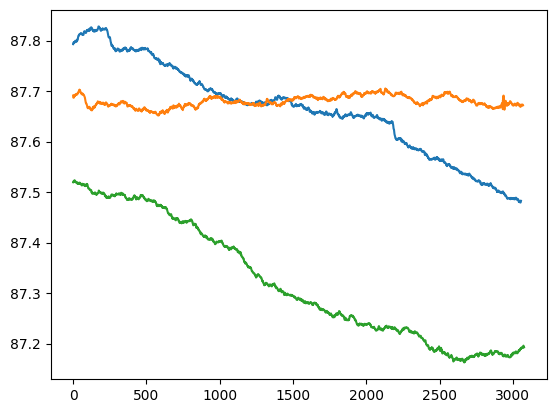

In [36]:
plt.plot(plot1)
plt.plot(plot2)
plt.plot(plot3)
# plt.plot(euler_y)
# plt.plot(euler_z)

In [42]:
def Somega(omega):
    x, y, z = np.reshape(omega, 3)
    out = np.array([
        [0,-x,-y,-z],
        [x,0,x,-y],
        [y,-z,0,x],
        [z,y,-x,0]
    ])
    return out

def Sq(q):
    q0, q1, q2, q3 = np.reshape(q, 4)
    out = np.array([
        [-q1,-q2,-q3],
        [q0,-q3,q2],
        [q3,q0,-q1],
        [-q2,q1,q0]
    ])
    return out

In [43]:
q = np.reshape(q11, (4, 1))
q_list = [q]
I4 = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

for i in range(1, len(data['timestamp'])):
    dt = (data['timestamp'][i] - data['timestamp'][i - 1]) / 1000
    omega = np.array([data['x_gyro'][i], data['y_gyro'][i], data['z_gyro'][i]]) * np.pi / 180
    q = np.matmul(I4 + 0.5 * Somega(omega) * dt, q) + 0.5 * dt * np.matmul(Sq(q), np.reshape(omega, (3, 1)))
    q = np.reshape(q, (4, 1))
    q_list.append(q)

    

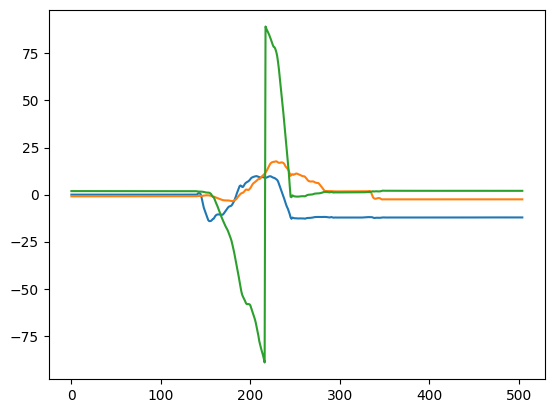

In [44]:
euler_x = []
euler_y = []
euler_z = []

for q, timestamp in zip(q_list, data['timestamp']):
    q = np.reshape(q, 4)
    euler = quat_to_euler(q) * 180 / np.pi
    euler_x.append(euler[0])
    euler_y.append(euler[1])
    euler_z.append(euler[2])

plt.plot(euler_x)
plt.plot(euler_y)
plt.plot(euler_z)
plt.show()